<a href="https://colab.research.google.com/github/Gowthamabinav-VP/SDC_GENAI/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.5506 - loss: 0.7319 - val_accuracy: 0.5063 - val_loss: 0.7146
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5294 - loss: 0.7074 - val_accuracy: 0.5437 - val_loss: 0.6857
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5485 - loss: 0.6843 - val_accuracy: 0.5688 - val_loss: 0.6639
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5817 - loss: 0.6604 - val_accuracy: 0.6250 - val_loss: 0.6444
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6688 - loss: 0.6321 - val_accuracy: 0.6687 - val_loss: 0.6247
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7087 - loss: 0.6129 - val_accuracy: 0.7188 - val_loss: 0.6045
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7900 - loss: 0.5829 - val_accuracy: 0.7312 - val_loss: 0.5829
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7880 - loss: 0.5725 - val_accuracy: 0.7625 - val_

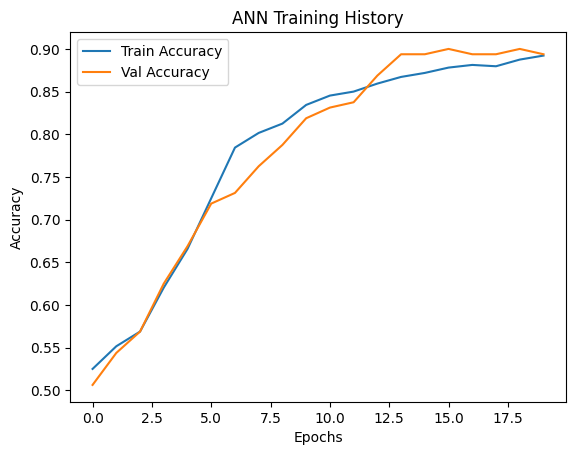

In [1]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 2: Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8,
                           n_redundant=2, n_classes=2, random_state=42)

# Step 3: Preprocess data
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the ANN model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 5: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Step 7: Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("ANN Training History")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
